In [295]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [296]:
from util import keys
cid = keys['CLIENT_ID']
secret = keys['CLIENT_SECRET']
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [297]:
def create_df_from_playlist(playlist_link: str, save: int):
    playlist_URI = playlist_link.split("/")[-1].split("?")[0]
    track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
    # print(sp.playlist_tracks(playlist_URI)["items"])
    
    features = sp.audio_features(track_uris[0])[0]
    cols = ["track_name", "id", "track_pop", "artist_name", "artist_pop", "artist_genre"]
    cols.extend(features.keys())
    cols.append("save")
    df = pd.DataFrame(columns=cols)
    
    for curr_uri in track_uris:
        row = []
        track = sp.track(curr_uri)
        row.append(track["name"])
        row.append(curr_uri)
        track_pop = row.append(track["popularity"])
        artist_uri = track["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri) 
        #Name, popularity, genre
        artist_name = row.append(track["artists"][0]["name"])
        artist_pop = row.append(artist_info["popularity"])
        artist_genres = row.append(artist_info["genres"])
        
        features = sp.audio_features(curr_uri)[0]
        # print(features)
        
        row.extend(features.values())
        row.append(save)
        
        new_row = pd.DataFrame([row], columns=df.columns)
        
        # Append the new row to df
        df = pd.concat([df, new_row], ignore_index=True)
    return df

In [298]:
def create_arr_from_song(song_link: str):
    song_URI = song_link.split("/")[-1].split("?")[0]
    row = []
    track = sp.track(song_URI)
    track_pop = row.append(track["popularity"])
    artist_uri = track["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri) 
    #Name, popularity, genre
    artist_pop = row.append(artist_info["popularity"])

    features = sp.audio_features(song_URI)[0]
    # print(features)

    row.extend(features.values())
    # arr = np.array(row)
    return row

# create_arr_from_song("https://open.spotify.com/track/6TW4bM3L1tyiUlCnQUkS1U?si=28567c1380254b15")

In [299]:
# good = create_df_from_playlist("https://open.spotify.com/playlist/6vOYm55EbfPnFpAgZynn6I?si=9070e8f011494eb0", 1)
# good2 = create_df_from_playlist("https://open.spotify.com/playlist/1bb77h4aEV7sutQ8EIvrL9?si=4ed01da7142d4f72", 1)
# bad = create_df_from_playlist("https://open.spotify.com/playlist/5Dflf6jWmbFbpgjsJV4cwI?si=36def02aab974355", 0)
# 
# df = pd.concat([good, good2, bad], ignore_index=True)
df = pd.read_csv("eric_samples.csv")
df

,Unnamed: 0,track_name,id,track_pop,artist_name,artist_pop,artist_genre,danceability,energy,key,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,save
0,0,Day Stalker,spotify:track:4bRfxOqnnsz24rruXiJqzZ,47,Carpenter Brut,54,"[cyberpunk, darksynth, synthwave]",0.477,0.762,11,...,0.2460,136.982,audio_features,4bRfxOqnnsz24rruXiJqzZ,spotify:track:4bRfxOqnnsz24rruXiJqzZ,https://api.spotify.com/v1/tracks/4bRfxOqnnsz2...,https://api.spotify.com/v1/audio-analysis/4bRf...,224240,4,1
1,1,Head Over Heels / Broken,spotify:track:0aF9m87P8Tja3NUMv4DfHt,67,Tears For Fears,74,"[new romantic, new wave, new wave pop, permane...",0.298,0.704,7,...,0.6550,95.023,audio_features,0aF9m87P8Tja3NUMv4DfHt,spotify:track:0aF9m87P8Tja3NUMv4DfHt,https://api.spotify.com/v1/tracks/0aF9m87P8Tja...,https://api.spotify.com/v1/audio-analysis/0aF9...,302120,4,1
2,2,Can You Hear The Music,spotify:track:4VnDmjYCZkyeqeb0NIKqdA,77,Ludwig Göransson,66,"[nordic soundtrack, orchestral soundtrack, sou...",0.190,0.435,4,...,0.0643,138.515,audio_features,4VnDmjYCZkyeqeb0NIKqdA,spotify:track:4VnDmjYCZkyeqeb0NIKqdA,https://api.spotify.com/v1/tracks/4VnDmjYCZkye...,https://api.spotify.com/v1/audio-analysis/4VnD...,110160,4,1
3,3,Heaven Up There,spotify:track:3Rl26h1HiMCV0HFHHVb2IM,58,Palace,59,[english indie rock],0.424,0.420,4,...,0.1760,138.079,audio_features,3Rl26h1HiMCV0HFHHVb2IM,spotify:track:3Rl26h1HiMCV0HFHHVb2IM,https://api.spotify.com/v1/tracks/3Rl26h1HiMCV...,https://api.spotify.com/v1/audio-analysis/3Rl2...,437577,4,1
4,4,Intro,spotify:track:6XDFFeinPXgy3auyC7huoC,49,M83,70,"[french shoegaze, french synthpop, indietronic...",0.408,0.760,6,...,0.0380,105.008,audio_features,6XDFFeinPXgy3auyC7huoC,spotify:track:6XDFFeinPXgy3auyC7huoC,https://api.spotify.com/v1/tracks/6XDFFeinPXgy...,https://api.spotify.com/v1/audio-analysis/6XDF...,322760,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,Breathe,spotify:track:4QvchxEDRzAosUOkZzJGI6,45,DOE,49,[],0.558,0.394,9,...,0.0949,56.454,audio_features,4QvchxEDRzAosUOkZzJGI6,spotify:track:4QvchxEDRzAosUOkZzJGI6,https://api.spotify.com/v1/tracks/4QvchxEDRzAo...,https://api.spotify.com/v1/audio-analysis/4Qvc...,172218,4,0
211,211,Girls,spotify:track:7EjL6DoRMa601VXjoyyBSE,60,Rachel Platten,61,"[post-teen pop, talent show, viral pop]",0.521,0.186,2,...,0.5390,74.227,audio_features,7EjL6DoRMa601VXjoyyBSE,spotify:track:7EjL6DoRMa601VXjoyyBSE,https://api.spotify.com/v1/tracks/7EjL6DoRMa60...,https://api.spotify.com/v1/audio-analysis/7EjL...,171022,3,0
212,212,unravel,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,74,TK from Ling tosite sigure,56,"[j-poprock, j-rock]",0.508,0.889,7,...,0.3320,135.014,audio_features,1rN9QoVxw5U7TJkyaUR8C1,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,https://api.spotify.com/v1/tracks/1rN9QoVxw5U7...,https://api.spotify.com/v1/audio-analysis/1rN9...,238360,4,0
213,213,DADDY,spotify:track:1eMVXXpNPEUdFRy5ZH7FpM,63,PSY,62,"[k-rap, korean old school hip hop]",0.762,0.869,6,...,0.7470,132.050,audio_features,1eMVXXpNPEUdFRy5ZH7FpM,spotify:track:1eMVXXpNPEUdFRy5ZH7FpM,https://api.spotify.com/v1/tracks/1eMVXXpNPEUd...,https://api.spotify.com/v1/audio-analysis/1eMV...,230635,4,0


# Feature Engineering

In [300]:
feature_cols = ["track_pop", "artist_pop", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

X = df[feature_cols]
y = df["save"]
y = y.astype(int)

Correlation Heatmap between features

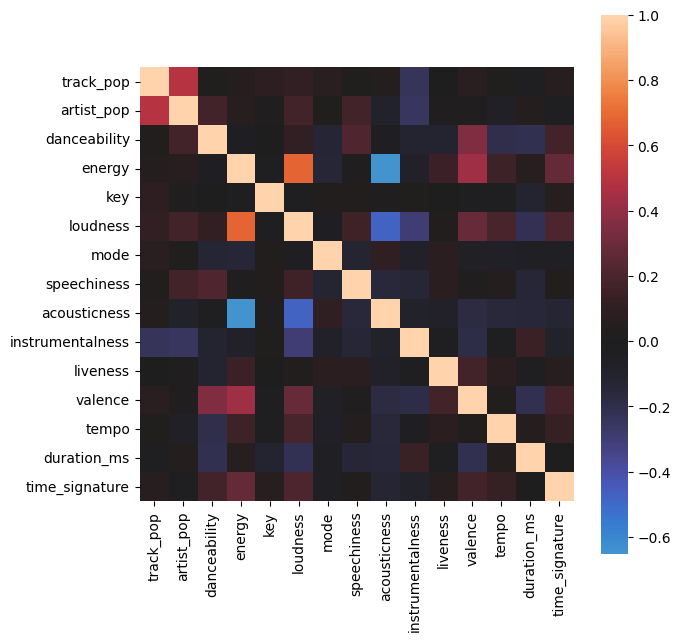

In [301]:
import seaborn as sns
plt.gcf().set_size_inches(7, 7)
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(X.corr(), center=0, annot=False, square=True)
plt.show()

In [302]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing inf values with NaN, you can choose to either drop or fill those as well
missing_or_infinite_values = X.isnull().any().any()

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\1383783196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Accuracy

In [303]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.6296296296296297

Confusion Matrix

In [304]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, normalize='all')

array([[0.37037037, 0.16666667],
       [0.2037037 , 0.25925926]])

### Precision, Recall, F1-Score, and Support where index 0 is for the class 0 and index 1 is for the class 1

In [305]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred)

(array([0.64516129, 0.60869565]),
 array([0.68965517, 0.56      ]),
 array([0.66666667, 0.58333333]),
 array([29, 25], dtype=int64))

Conclusion: Poor precision, high accuracy

### Support Vector Machines

In [306]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.7037037037037037 PRFS:  (array([0.68571429, 0.73684211]), array([0.82758621, 0.56      ]), array([0.75      , 0.63636364]), array([29, 25], dtype=int64))


### Random Forest

In [307]:
from sklearn.ensemble import RandomForestClassifier
RFM = RandomForestClassifier(n_estimators=10)
RFM.fit(X_train, y_train)

y_pred = RFM.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.7222222222222222 PRFS:  (array([0.69444444, 0.77777778]), array([0.86206897, 0.56      ]), array([0.76923077, 0.65116279]), array([29, 25], dtype=int64))


### Naive Bayes

In [308]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.6666666666666666 PRFS:  (array([0.65714286, 0.68421053]), array([0.79310345, 0.52      ]), array([0.71875   , 0.59090909]), array([29, 25], dtype=int64))


### KNN

In [309]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.6851851851851852 PRFS:  (array([0.71428571, 0.65384615]), array([0.68965517, 0.68      ]), array([0.70175439, 0.66666667]), array([29, 25], dtype=int64))


# PREDICT A SONG HERE

In [310]:
song_link = input("Song Link: ")

arr = create_arr_from_song(song_link)
# print(arr[:13], arr[18:len(arr)])
data = arr[:13]
data.extend(arr[18:])
# print(data)
X_input = np.array([data])
X_input = X_input.astype(float)

RFM.predict(X_input)

SpotifyException: http status: 400, code:-1 - Unsupported URL / URI., reason: None

# PREDICT PLAYLIST HERE

In [ ]:
playlist_link = input("Playlist Link: ")

df = create_df_from_playlist(playlist_link, 0)
X_input = df[feature_cols]
# print(arr[:13], arr[18:len(arr)])
# data = arr[:13]
# data.extend(arr[18:])
# print(data)
X_input = X_input.astype(float)
y_input = df["save"]
y_input = y_input.astype(int)

y_pred = RFM.predict(X_input)
y_pred

In [ ]:
acc = accuracy_score(y_input, y_pred, normalize=True)
1 - acc